In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
import survivors.datasets as ds

import warnings
warnings.filterwarnings("ignore")

In [13]:
X, y, feat, categ, _ = ds.load_backblaze_2016_2018(threshold=0.99)
X["smart_9_raw"] = X["smart_9_raw"] // 24
X["time"] = y["time"]
X["cens"] = y["cens"]

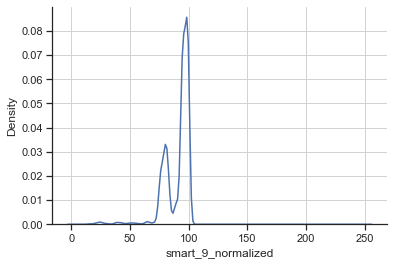

In [44]:
sns.kdeplot(X["smart_9_normalized"])
X["smart_9_normalized"].quantile([0.025, 0.975])

X = X[(X["smart_9_normalized"] >= 60) & (X["smart_9_normalized"] <= 100)]

<Axes: xlabel='model'>

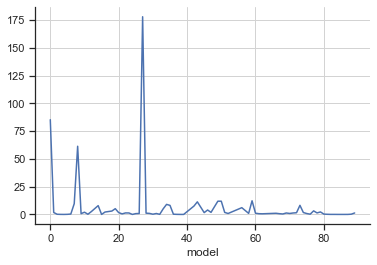

In [45]:
a = X.groupby("model").agg({"smart_9_raw": "median", "time": "median"})
(a["smart_9_raw"] / a["time"]).plot()

<Axes: xlabel='smart_9_normalized', ylabel='time'>

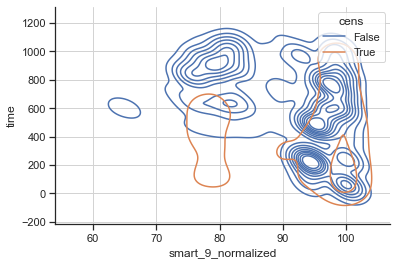

In [46]:
# sns.scatterplot(x=X["smart_9_raw"], y=y["time"])
# sns.kdeplot(pd.DataFrame(y), x="time", hue="cens")
sns.kdeplot(X, x="smart_9_normalized", y="time", hue="cens")

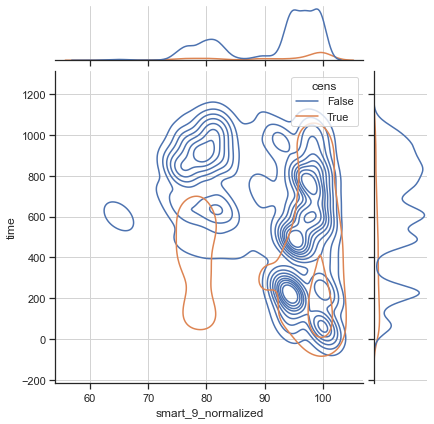

In [47]:
sns.jointplot(data=X, x="smart_9_normalized", y="time", hue="cens", kind="kde")

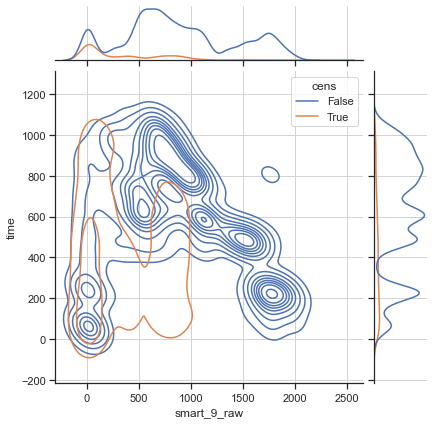

In [48]:
sns.jointplot(data=X, x="smart_9_raw", y="time", hue="cens", kind="kde")

<Axes: xlabel='time', ylabel='Density'>

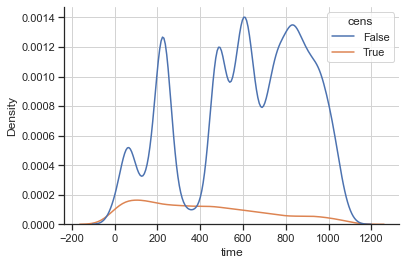

In [4]:
sns.kdeplot(pd.DataFrame(y), x="time", hue="cens")

In [5]:
X, y, feat, categ, _ = ds.load_alibaba_dataset(threshold=1)

In [6]:
X

,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,...,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw
0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,15.0,100.0,0.0,64.0,2703879.0,100.0,25.0
1,100.0,0.0,100.0,29.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,29.0,100.0,0.0,73.0,18196221.0,100.0,83.0
2,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,69.0,7205841.0,100.0,29.0
3,100.0,0.0,100.0,30.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,85.0,0.0,100.0,30.0,100.0,0.0,72.0,16669075.0,100.0,77.0
4,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,21.0,100.0,0.0,70.0,10500760.0,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,100.0,4.295033e+09,...,93.0,0.0,100.0,8.0,93.0,1304.0,81.0,139435883.0,81.0,16869.0
33953,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,21.0,100.0,0.0,70.0,10438056.0,100.0,107.0
33954,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,72.0,16909229.0,100.0,232.0
33955,100.0,0.0,100.0,16.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,16.0,100.0,0.0,70.0,11195897.0,100.0,708.0


<Axes: xlabel='time', ylabel='Density'>

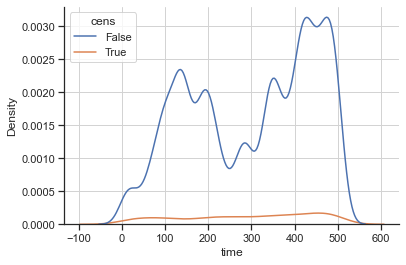

In [7]:
sns.kdeplot(pd.DataFrame(y), x="time", hue="cens")

### Start global collecting

In [13]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201707.csv")

In [16]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')

In [18]:
df.loc[df.groupby("serial_number")['dt'].idxmin()]

,Unnamed: 0,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_2_normalized,smart_2raw,smart_3_normalized,smart_3raw,...,smart_251raw,smart_252_normalized,smart_252raw,smart_253_normalized,smart_253raw,smart_254_normalized,smart_254raw,smart_255_normalized,smart_255raw,dt
439231,117229,disk_0,A,1,75.0,36922350.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061003,95000,disk_10,A,1,78.0,83633685.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061004,95001,disk_1000,A,1,66.0,4737867.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12
392461,70459,disk_10000,A,1,78.0,73489666.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
91964,91964,disk_100007,A,1,80.0,117317462.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530269,47266,disk_99989,A,1,82.0,169365418.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1084536,118533,disk_9999,A,1,74.0,29302258.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
26747,26747,disk_99991,A,1,74.0,25563473.0,NaN,NaN,93.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
891170,86165,disk_99994,A,1,81.0,119401139.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09


In [2]:
import os

main_dir = r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020"
for postfix in ["2017", "2018_Q1", "2018_Q2", "2018_Q3", "2018_Q4"]:
    l_df = []
    dir_global = os.path.join(main_dir, f"smartlog_data_{postfix}")
    for filename in os.listdir(dir_global):
        full_filename = os.path.join(dir_global, filename)
        print(full_filename)
        df = pd.read_csv(full_filename)
        df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmin()])
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmax()])
        del df
    print("End of loading!")
    df = pd.concat(l_df).reset_index(drop=True)
    df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                    df.loc[df.groupby("serial_number")['dt'].idxmax()]]).reset_index(drop=True)
    df.to_csv(os.path.join(main_dir, "Prepared", f"Alibaba_{postfix}.csv.gz"), index=False, compression='gzip')

D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201707.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201708.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201709.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201710.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201711.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201712.csv
End of loading!
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201801.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201802.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201803.csv
End of loading!
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q2\smartlog_data_201804.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q2\smartlog_data_201805.csv
D:\Surv

In [ ]:
collect_dir = r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Prepared"

l_df = []
for filename in os.listdir(collect_dir):
    full_filename = os.path.join(collect_dir, filename)
    print(full_filename)
    df = pd.read_csv(full_filename, compression='gzip')
    l_df.append(df)
df = pd.concat(l_df).reset_index()

In [6]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y-%m-%d')
df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                df.loc[df.groupby("serial_number")['dt'].idxmax()]]).reset_index()
df.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Global_Alibaba.csv.gz", index=False, compression='gzip')

### Final collecting

In [64]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Global_Alibaba.csv.gz", compression='gzip')

In [66]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y-%m-%d')
df["max_dt"] = df.groupby("serial_number")["dt"].transform("max")
df["time"] = (df["max_dt"] - df["dt"]).dt.days
df = df[df["time"] > 0]
# df = df[df["time"] < 500]

<Axes: xlabel='time', ylabel='Density'>

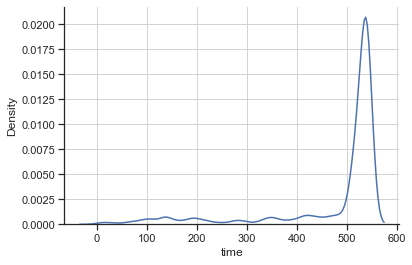

In [67]:
sns.kdeplot(df["time"])

In [85]:
df_target = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\fault_tag_data.csv")
df_target["fault_time"] = pd.to_datetime(df_target["fault_time"], format='%Y-%m-%d')
df_target = df_target.loc[df_target.groupby("serial_number")['fault_time'].idxmax()]

In [107]:
df_ = df.merge(df_target[["serial_number", "fault_time"]], how="left", on="serial_number")
df_["event"] = df_["fault_time"].notna()

In [108]:
df_["event"].sum()

2382

In [109]:
df_["final_dt"] = df_[["max_dt", "fault_time"]].apply(lambda x: x["max_dt"] if pd.isna(x["fault_time"]) else x["fault_time"], axis=1)
df_["event_time"] = (df_["final_dt"] - df_["dt"]).dt.days
df_ = df_[df_["event_time"] > 0]
df_ = df_[df_["event_time"] < 510]

In [110]:
df_.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Final_Alibaba.csv.gz", index=False, compression='gzip')

In [118]:
df_ = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Final_Alibaba.csv.gz", compression='gzip')
df_.columns = [f"{c[:-3]}_raw" if c.endswith("raw") else c for c in df_.columns]
df_cut = df_.iloc[:, 3:-7]
df_cut["event"] = df_["event"]
df_cut["event_time"] = df_["event_time"]

In [138]:
df_cut.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Cut_Alibaba.csv.gz", index=False, compression='gzip')

In [142]:
df_cut

,serial_number,manufacturer,model,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_252_normalized,smart_252_raw,smart_253_normalized,smart_253_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,event,event_time
0,disk_1,A,2,73.0,18855387.0,NaN,NaN,86.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,471
1,disk_100001,A,2,100.0,11308.0,NaN,NaN,88.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
2,disk_100003,A,2,74.0,26743349.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
3,disk_100005,A,2,100.0,628797.0,NaN,NaN,85.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,184
4,disk_100006,A,2,100.0,10613.0,NaN,NaN,86.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,disk_99991,A,1,74.0,25563473.0,NaN,NaN,93.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,256
33953,disk_99993,A,2,100.0,11421.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,184
33954,disk_99995,A,2,100.0,12045.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,192
33955,disk_99997,A,2,81.0,128753202.0,NaN,NaN,88.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,149


## Experiments

In [57]:
X_b, y_b, feat_b, categ_b, _ = ds.load_backblaze_2016_2018(threshold=0.99)
feat_b = feat_b[2:]
categ_b = []
X_b = X_b[feat_b]

In [58]:
X_a, y_a, feat_a, categ_a, _ = ds.load_alibaba_dataset(threshold=1)

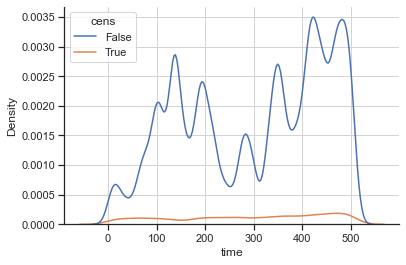

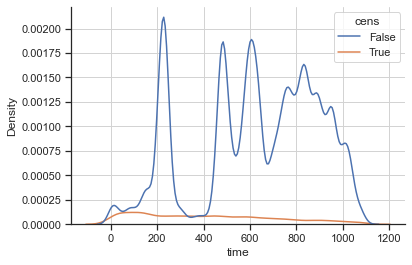

In [60]:
min_rows = min(X_a.shape[0], X_b.shape[0])
y_a = y_a[:min_rows]
X_a = X_a[:min_rows]
y_b = y_b[:min_rows]
X_b = X_b[:min_rows]

sns.kdeplot(pd.DataFrame(y_a), x="time", hue="cens", bw_adjust=0.6)
plt.show()

sns.kdeplot(pd.DataFrame(y_b), x="time", hue="cens", bw_adjust=0.6)
plt.show()

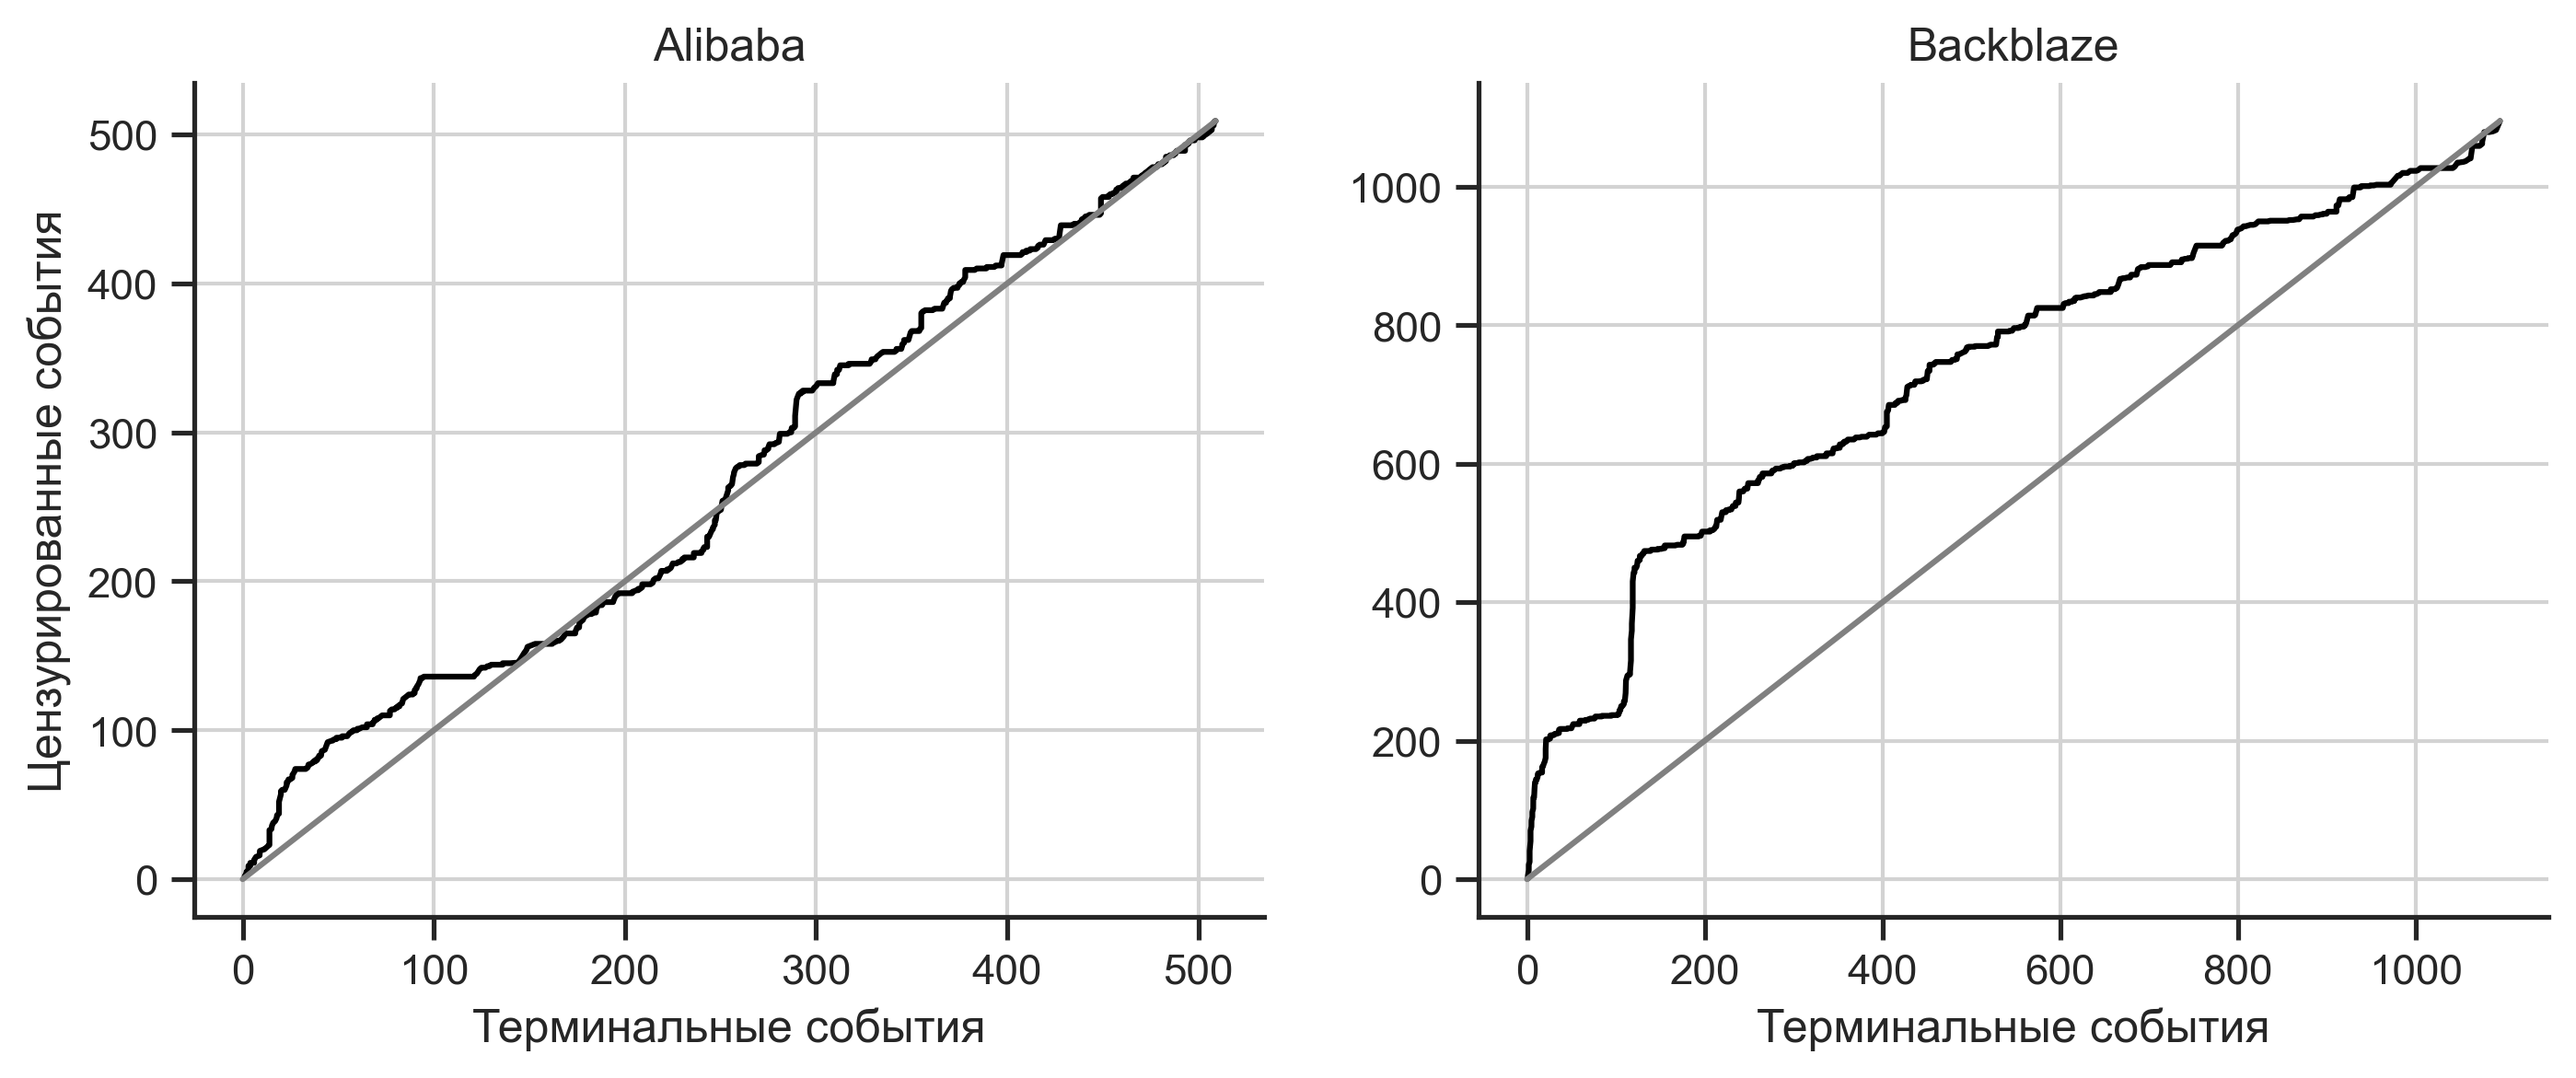

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
y = y_a

for i, y in enumerate([y_a, y_b]):
    axes[i].plot(np.quantile(y[y["cens"] == 1]["time"], np.linspace(0, 1, 1000)),
             np.quantile(y[y["cens"] == 0]["time"], np.linspace(0, 1, 1000)), color="black")
    axes[i].plot([0, y["time"].max()], [0, y["time"].max()], c="gray")
    axes[i].set_xlabel("Терминальные события")
axes[0].set_ylabel("Цензурированные события")
axes[0].set_title("Alibaba")
axes[1].set_title("Backblaze")
fig.set_dpi(300.0)
plt.savefig("./AB_QQ.pdf", format="pdf", dpi=300, pad_inches=0.0, transparent=True)
plt.show()

In [62]:
from survivors.experiments.grid import generate_sample, prepare_sample, count_metric
from sklearn.model_selection import train_test_split

X_a_TR, X_a_HO = train_test_split(X_a, stratify=y_a["cens"], test_size=0.33, random_state=42)
X_a_ftr, y_a_ftr, X_a_HO, y_a_HO, bins_a_HO = prepare_sample(X_a, y_a, X_a_TR.index, X_a_HO.index)
X_a_tr, X_a_val, y_a_tr, y_a_val = train_test_split(X_a_ftr, y_a_ftr, stratify=y_a_ftr["cens"], test_size=0.2, random_state=42)

X_b_TR, X_b_HO = train_test_split(X_b, stratify=y_b["cens"], test_size=0.33, random_state=42)
X_b_ftr, y_b_ftr, X_b_HO, y_b_HO, bins_b_HO = prepare_sample(X_b, y_b, X_b_TR.index, X_b_HO.index)
X_b_tr, X_b_val, y_b_tr, y_b_val = train_test_split(X_b_ftr, y_b_ftr, stratify=y_b_ftr["cens"], test_size=0.2, random_state=42)

In [63]:
from survivors.tree import CRAID
from sklearn.model_selection import ParameterGrid

CRAID_grid = {"leaf_model": ["base_zero_after"],  # "base", 
        "criterion": ["logrank", "peto", "tarone-ware"],
        "depth": [12], # [5, 8, 12]
        "min_samples_leaf": [0.01, 0.005, 0.001, 0.0005, 0.0001],
        "cut": [False],
}

def search_hyperparams(n_model, grid, X_tr, y_tr, 
                       X_val, y_val, bins_val, verbose=False):
    grid_params = ParameterGrid(grid)
    l_p = []
    for p in grid_params:
        tree = n_model(**p)
        tree.fit(X_tr, y_tr)
        sf = tree.predict_at_times(X_val, bins_val, mode="surv")
        ibs_tr = metr.ibs_remain(y_val, y_val, sf, bins_val)
        if verbose:
            print(p, ibs_tr)
        l_p.append((p, ibs_tr))
    l_p = sorted(l_p, key=lambda x: x[1])
    best_param = l_p[0][0]
    return best_param

def apply_model(model, X_tr, y_tr, l_HO):
    d = {}
    model.fit(X_tr, y_tr)
    for i, l in enumerate(l_HO):
        X_HO, y_HO, bins_HO = l
        sf = model.predict_at_times(X_HO, bins_HO, mode="surv")
        hf = model.predict_at_times(X_HO, bins_HO, mode="hazard")
        d[f"IBS {i}"] = metr.ibs_remain(y_HO, y_HO, sf, bins_HO)
        d[f"AUPRC {i}"] = metr.auprc(y_HO, y_HO, sf, bins_HO)
        d[f"IAUC {i}"] = metr.iauc(y_HO, y_HO, hf, bins_HO)
#         print(f"IBS: {d[f'IBS {i}']:.5f}")
#         print(f"AUPRC: {metr.auprc(y_HO, y_HO, sf, bins_HO):.5f}")
#         print(f"IAUC: {metr.iauc(y_HO, y_HO, hf, bins_HO):.5f}")
#         print()
    return model, d

## Statistical methods

In [82]:
a = pd.DataFrame([{"METHOD": "CRAID", "Stratify": "124124"}, {"METHOD": "GANCRAID", "Stratify": "222"}])
stratify_name = "Stratify"
# a["METHOD_FULL"] = a["METHOD"].str.replace("CRAID", a["Stratify"].apply(lambda x: f"Tree({x})"))
a.apply(lambda x: x.METHOD.replace("CRAID", f"Tree({x[stratify_name]})"), axis=1)

0    Tree(124124)
1    GANTree(222)
dtype: object

In [83]:
a

,METHOD,Stratify
0,CRAID,124124
1,GANCRAID,222


## ML methods

In [64]:
from survivors.tree import CRAID

l_d = []
class_model = CRAID
grid = CRAID_grid

In [65]:
### Best model A hyperparams on self sample & sample B

best_param_a = search_hyperparams(class_model, grid, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A: {best_param_a}")
model_a_a, d_a_a = apply_model(class_model(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_a_a["Method"] = "A"
d_a_a["Val"] = "A"
d_a_a["p"] = np.nan
l_d.append(d_a_a)

best_param_b = search_hyperparams(class_model, grid, X_a_tr, y_a_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B: {best_param_b}")
model_a_b, d_a_b = apply_model(class_model(**best_param_b), X_a_ftr, y_a_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_a_b["Method"] = "A"
d_a_b["Val"] = "B"
d_a_b["p"] = np.nan
l_d.append(d_a_b)

Best param A: {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.005}
Best param B: {'criterion': 'logrank', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.0005}


In [66]:
### Best model B hyperparams on self sample & sample A

best_param_a = search_hyperparams(class_model, grid, X_b_tr, y_b_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A: {best_param_a}")
model_b_a, d_b_a = apply_model(class_model(**best_param_a), X_b_ftr, y_b_ftr,
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_b_a["Method"] = "B"
d_b_a["Val"] = "A"
d_b_a["p"] = np.nan
l_d.append(d_b_a)

best_param_b = search_hyperparams(class_model, grid, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B: {best_param_b}")
model_b_b, d_b_b = apply_model(class_model(**best_param_b), X_b_ftr, y_b_ftr,
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_b_b["Method"] = "B"
d_b_b["Val"] = "B"
d_b_b["p"] = np.nan
l_d.append(d_b_b)

Best param A: {'criterion': 'peto', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.005}
Best param B: {'criterion': 'logrank', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}


In [67]:
# best_param = {'criterion': 'peto', 'cut': False, 'depth': 12, 
#      'min_samples_leaf': 0.005, 'woe': True}

X_meta_tr = pd.concat([X_a_tr, X_b_tr])
y_meta_tr = np.concatenate([y_a_tr, y_b_tr])

X_meta_ftr = pd.concat([X_a_ftr, X_b_ftr])
y_meta_ftr = np.concatenate([y_a_ftr, y_b_ftr])

best_param_a = search_hyperparams(class_model, grid, X_meta_tr, y_meta_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A: {best_param_a}")
shared_model_a, d_ab_a = apply_model(class_model(**best_param_a), X_meta_ftr, y_meta_ftr,
                               [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_ab_a["Method"] = "A+B"
d_ab_a["Val"] = "A"
d_ab_a["p"] = np.nan
l_d.append(d_ab_a)

best_param_b = search_hyperparams(class_model, grid, X_meta_tr, y_meta_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B: {best_param_b}")
shared_model_b, d_ab_b = apply_model(class_model(**best_param_b), X_meta_ftr, y_meta_ftr,
                             [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
d_ab_b["Method"] = "A+B"
d_ab_b["Val"] = "B"
d_ab_b["p"] = np.nan
l_d.append(d_ab_b)

Best param A: {'criterion': 'logrank', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}
Best param B: {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}


In [68]:
for p in ([0.01] + list(np.linspace(0.1, 0.9, 9)) + [0.99]):
    X_a_sample_ftr, _, y_a_sample_ftr, _ = train_test_split(X_a_ftr, y_a_ftr, stratify=y_a_ftr["cens"], 
                                                            test_size=p, random_state=42)
    X_a_sample_tr, X_a_sample_val, y_a_sample_tr, y_a_sample_val = train_test_split(X_a_sample_ftr, y_a_sample_ftr, 
                                                            stratify=y_a_sample_ftr["cens"], 
                                                            test_size=0.2, random_state=42)

    X_b_sample_ftr, _, y_b_sample_ftr, _ = train_test_split(X_b_ftr, y_b_ftr, stratify=y_b_ftr["cens"], 
                                                            test_size=1-p, random_state=42)
    X_b_sample_tr, X_b_sample_val, y_b_sample_tr, y_b_sample_val = train_test_split(X_b_sample_ftr, y_b_sample_ftr, 
                                                                    stratify=y_b_sample_ftr["cens"], 
                                                                    test_size=0.2, random_state=42)
    
    X_meta_tr = pd.concat([X_a_sample_tr, X_b_sample_tr])
    y_meta_tr = np.concatenate([y_a_sample_tr, y_b_sample_tr])

    X_meta_ftr = pd.concat([X_a_sample_ftr, X_b_sample_ftr])
    y_meta_ftr = np.concatenate([y_a_sample_ftr, y_b_sample_ftr])
    
    best_param_a = search_hyperparams(class_model, grid, X_meta_tr, y_meta_tr, 
                                  X_a_sample_val, y_a_sample_val, bins_a_HO)
    print(f"Best param A (p={p}): {best_param_a}")
    shared_model_a, d_mix_ab_a = apply_model(class_model(**best_param_a), X_meta_ftr, y_meta_ftr,
                                   [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
    d_mix_ab_a["Method"] = f"A({p})+B({1-p})"
    d_mix_ab_a["Val"] = "A"
    d_mix_ab_a["p"] = p
    l_d.append(d_mix_ab_a)


    best_param_b = search_hyperparams(class_model, grid, X_meta_tr, y_meta_tr, 
                                      X_b_sample_val, y_b_sample_val, bins_b_HO)
    print(f"Best param B (p={p}): {best_param_b}")
    shared_model_b, d_mix_ab_b = apply_model(class_model(**best_param_b), X_meta_ftr, y_meta_ftr,
                                 [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
    d_mix_ab_b["Method"] = f"A({p})+B({1-p})"
    d_mix_ab_b["Val"] = "B"
    d_mix_ab_b["p"] = p
    l_d.append(d_mix_ab_b)

Best param A (p=0.01): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}
Best param B (p=0.01): {'criterion': 'logrank', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}
Best param A (p=0.1): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}
Best param B (p=0.1): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.01}
Best param A (p=0.2): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.005}
Best param B (p=0.2): {'criterion': 'peto', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.01}
Best param A (p=0.30000000000000004): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001}
Best param B (p=0.30000000000

In [69]:
df_summary = pd.DataFrame(l_d)

In [70]:
for m in ["IBS", "AUPRC", "IAUC"]:
    df_summary[f"{m} mean"] = (df_summary[f"{m} 0"] + df_summary[f"{m} 1"]) / 2

In [71]:
df_summary

,IBS 0,AUPRC 0,IAUC 0,IBS 1,AUPRC 1,IAUC 1,Method,Val,p,IBS mean,AUPRC mean,IAUC mean
0,0.052133,0.951769,0.664576,0.332829,0.761751,0.344612,A,A,NaN,0.192481,0.856760,0.504594
1,0.051506,0.956054,0.681945,0.362603,0.732491,0.377721,A,B,NaN,0.207054,0.844273,0.529833
2,0.072764,0.924202,0.442868,0.080774,0.935620,0.782777,B,A,NaN,0.076769,0.929911,0.612822
3,0.111973,0.912112,0.411986,0.077998,0.937914,0.672272,B,B,NaN,0.094985,0.925013,0.542129
4,0.051538,0.952838,0.662339,0.082657,0.934289,0.643117,A+B,A,NaN,0.067097,0.943563,0.652728
5,0.052422,0.952955,0.673491,0.078351,0.935808,0.778788,A+B,B,NaN,0.065386,0.944381,0.726140
6,0.052617,0.953599,0.676168,0.125777,0.907180,0.684152,A(0.01)+B(0.99),A,0.01,0.089197,0.930389,0.680160
7,0.051424,0.954331,0.691146,0.138527,0.899372,0.594833,A(0.01)+B(0.99),B,0.01,0.094976,0.926852,0.642990
8,0.053347,0.951700,0.678609,0.114385,0.915802,0.736274,A(0.1)+B(0.9),A,0.10,0.083866,0.933751,0.707442
9,0.056573,0.946383,0.641935,0.095110,0.921437,0.742027,A(0.1)+B(0.9),B,0.10,0.075842,0.933910,0.691981


In [72]:
df_summary.to_csv("./CRAID_summary_scaling.csv")

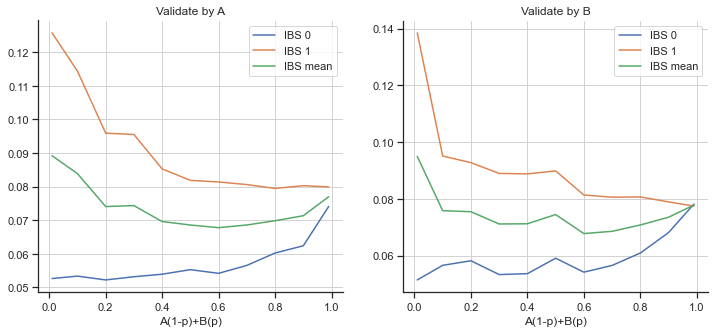

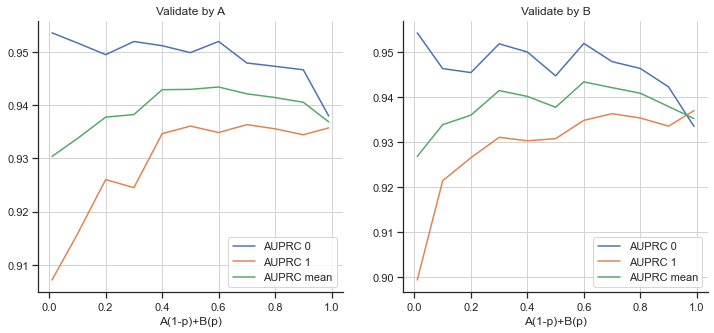

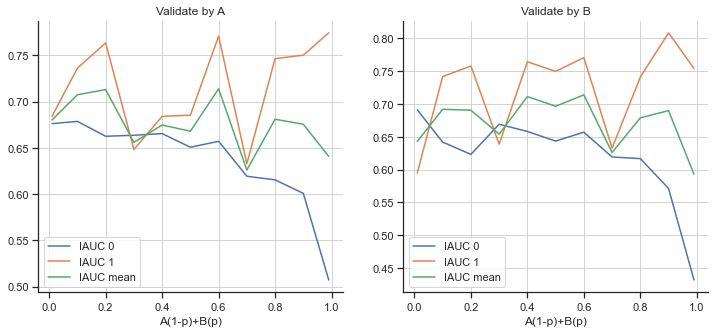

In [74]:
for m in ["IBS", "AUPRC", "IAUC"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    df_summary[6:][::2].set_index("p")[[f"{m} 0", f"{m} 1", f"{m} mean"]].plot(ax=axes[0])
    df_summary[6:][1::2].set_index("p")[[f"{m} 0", f"{m} 1", f"{m} mean"]].plot(ax=axes[1])
    axes[0].set_title("Validate by A")
    axes[0].set_xlabel("A(1-p)+B(p)")
    axes[1].set_title("Validate by B")
    axes[1].set_xlabel("A(1-p)+B(p)")
    plt.show()

## Thesis Trifonov

In [169]:
from survivors.ensemble import ParallelBootstrapCRAID

grid_bstr = {"leaf_model": ["base_zero_after"],  # "base", 
        "criterion": ["logrank", "tarone-ware"],
        "depth": [12],
        "min_samples_leaf": [0.001],
        "n_estimators": [50],
        "size_sample": [0.5]
}

# grid_bstr = {"leaf_model": ["base_zero_after"],  # "base", 
#         "criterion": ["logrank", "peto", "tarone-ware"],
#         "depth": [12],
#         "min_samples_leaf": [0.01, 0.005, 0.001],
#         "n_estimators": [10, 50],
#         "size_sample": [0.2, 0.5]
# }


best_param_a = search_hyperparams(ParallelBootstrapCRAID, grid_bstr, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A: {best_param_a}")
ens_a_a, d_a_a = apply_model(ParallelBootstrapCRAID(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_a_a)

best_param_b = search_hyperparams(ParallelBootstrapCRAID, grid_bstr, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B: {best_param_b}")
ens_b_b, d_b_b = apply_model(ParallelBootstrapCRAID(**best_param_b), X_b_ftr, y_b_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_b_b)

Best param A: {'criterion': 'logrank', 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001, 'n_estimators': 50, 'size_sample': 0.5}
{'IBS 0': 0.04538909890142166, 'AUPRC 0': 0.9637636316899895, 'IAUC 0': 0.7011824946316326, 'IBS 1': 0.2922110254754211, 'AUPRC 1': 0.7167821889625517, 'IAUC 1': 0.3117239776086119}
Best param B: {'criterion': 'tarone-ware', 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.001, 'n_estimators': 50, 'size_sample': 0.5}
{'IBS 0': 0.11589637920238065, 'AUPRC 0': 0.8231455806459572, 'IAUC 0': 0.4284311470720337, 'IBS 1': 0.07198471676902386, 'AUPRC 1': 0.9272377240203585, 'IAUC 1': 0.87238576268247}


In [73]:
from survivors.ensemble import ParallelBootstrapCRAID

grid_bstr = {"leaf_model": ["base"],  # "base", 
        "criterion": ["logrank", "peto", "tarone-ware"],
        "depth": [12],
        "min_samples_leaf": [0.01, 0.005, 0.001],
        "n_estimators": [10, 50],
        "size_sample": [0.2, 0.5]
}


best_param_a = search_hyperparams(ParallelBootstrapCRAID, grid_bstr, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A: {best_param_a}")
ens_a_a, d_a_a = apply_model(ParallelBootstrapCRAID(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_a_a)

best_param_b = search_hyperparams(ParallelBootstrapCRAID, grid_bstr, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B: {best_param_b}")
ens_b_b, d_b_b = apply_model(ParallelBootstrapCRAID(**best_param_b), X_b_ftr, y_b_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_b_b)

Best param A: {'criterion': 'logrank', 'depth': 12, 'leaf_model': 'base', 'min_samples_leaf': 0.001, 'n_estimators': 50, 'size_sample': 0.5}
{'IBS 0': 0.04697507564056277, 'AUPRC 0': 0.9607568586535, 'IAUC 0': 0.706194516300909, 'IBS 1': 0.1686506054616892, 'AUPRC 1': 0.7954691003095705, 'IAUC 1': 0.40585954100639365}
Best param B: {'criterion': 'tarone-ware', 'depth': 12, 'leaf_model': 'base', 'min_samples_leaf': 0.001, 'n_estimators': 50, 'size_sample': 0.5}
{'IBS 0': 0.11663699323089448, 'AUPRC 0': 0.7963794347490334, 'IAUC 0': 0.4078804365884984, 'IBS 1': 0.0841283283614801, 'AUPRC 1': 0.91441953542618, 'IAUC 1': 0.8091306505551347}


In [74]:
from survivors.tree import CRAID

grid = {"leaf_model": ["base_zero_after"],  # "base", 
        "criterion": ["logrank", "peto", "tarone-ware"],
        "depth": [12], # [5, 8, 12]
        "min_samples_leaf": [0.01, 0.005, 0.001, 0.0005, 0.0001],
        "cut": [False],
}
best_param_a = search_hyperparams(CRAID, grid, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A (base_zero_after): {best_param_a}")
model_a_a, d_a_a = apply_model(CRAID(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_a_a)

best_param_b = search_hyperparams(CRAID, grid, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B (base_zero_after): {best_param_b}")
model_b_b, d_b_b = apply_model(CRAID(**best_param_b), X_b_ftr, y_b_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_b_b)

Best param A (base_zero_after): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.005}
{'IBS 0': 0.05213315129636532, 'AUPRC 0': 0.9517687795597731, 'IAUC 0': 0.6645760319374385, 'IBS 1': 0.3156198948538673, 'AUPRC 1': 0.7570563621359819, 'IAUC 1': 0.3279658911060919}
Best param B (base_zero_after): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.005}
{'IBS 0': 0.09320543471862944, 'AUPRC 0': 0.901009844187497, 'IAUC 0': 0.4351151796038303, 'IBS 1': 0.07934674095309252, 'AUPRC 1': 0.9191370339971475, 'IAUC 1': 0.7969090188920561}


In [75]:
from survivors.tree import CRAID

grid = {"leaf_model": ["base"],  # "base", 
        "criterion": ["logrank", "peto", "tarone-ware"],
        "depth": [12], # [5, 8, 12]
        "min_samples_leaf": [0.01, 0.005, 0.001, 0.0005, 0.0001],
        "cut": [False],
}
best_param_a = search_hyperparams(CRAID, grid, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A (base): {best_param_a}")
model_a_a, d_a_a = apply_model(CRAID(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_a_a)

best_param_b = search_hyperparams(CRAID, grid, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B (base): {best_param_b}")
model_b_b, d_b_b = apply_model(CRAID(**best_param_b), X_b_ftr, y_b_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_b_b)

Best param A (base_zero_after): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base', 'min_samples_leaf': 0.005}
{'IBS 0': 0.051719917911797954, 'AUPRC 0': 0.9482622721301689, 'IAUC 0': 0.6686227655815896, 'IBS 1': 0.22808700429247827, 'AUPRC 1': 0.7870782228137284, 'IAUC 1': 0.37304674317824943}
Best param B (base_zero_after): {'criterion': 'tarone-ware', 'cut': False, 'depth': 12, 'leaf_model': 'base', 'min_samples_leaf': 0.001}
{'IBS 0': 0.12735167886036408, 'AUPRC 0': 0.8420580741972876, 'IAUC 0': 0.38862471154716755, 'IBS 1': 0.08938682600403171, 'AUPRC 1': 0.9037553639313661, 'IAUC 1': 0.7583843582382054}


In [90]:
from survivors.tree import CRAID

grid = {"leaf_model": ["base"],  # "base", 
        "criterion": ["logrank"],
        "depth": [2], # [5, 8, 12]
        "min_samples_leaf": [0.01],
        "cut": [False],
}
best_param_a = search_hyperparams(CRAID, grid, X_a_tr, y_a_tr, 
                                  X_a_val, y_a_val, bins_a_HO)
print(f"Best param A (base short): {best_param_a}")
model_a_a, d_a_a = apply_model(CRAID(**best_param_a), X_a_ftr, y_a_ftr, 
                        [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_a_a)

best_param_b = search_hyperparams(CRAID, grid, X_b_tr, y_b_tr, 
                                  X_b_val, y_b_val, bins_b_HO)
print(f"Best param B (base short): {best_param_b}")
model_b_b, d_b_b = apply_model(CRAID(**best_param_b, categ=["model"]), X_b_ftr, y_b_ftr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
print(d_b_b)

Best param A (base short): {'criterion': 'logrank', 'cut': False, 'depth': 2, 'leaf_model': 'base', 'min_samples_leaf': 0.01}
{'IBS 0': 0.06067827631341516, 'AUPRC 0': 0.9398394405993881, 'IAUC 0': 0.5785749755624118, 'IBS 1': 0.229962581640509, 'AUPRC 1': 0.7377077213498994, 'IAUC 1': 0.376082896461937}
Best param B (base short): {'criterion': 'logrank', 'cut': False, 'depth': 2, 'leaf_model': 'base', 'min_samples_leaf': 0.01}
{'IBS 0': 0.14265402582186862, 'AUPRC 0': 0.8373951801435469, 'IAUC 0': 0.2965511258607167, 'IBS 1': 0.10557106228124061, 'AUPRC 1': 0.9003070422865194, 'IAUC 1': 0.6953366741236001}


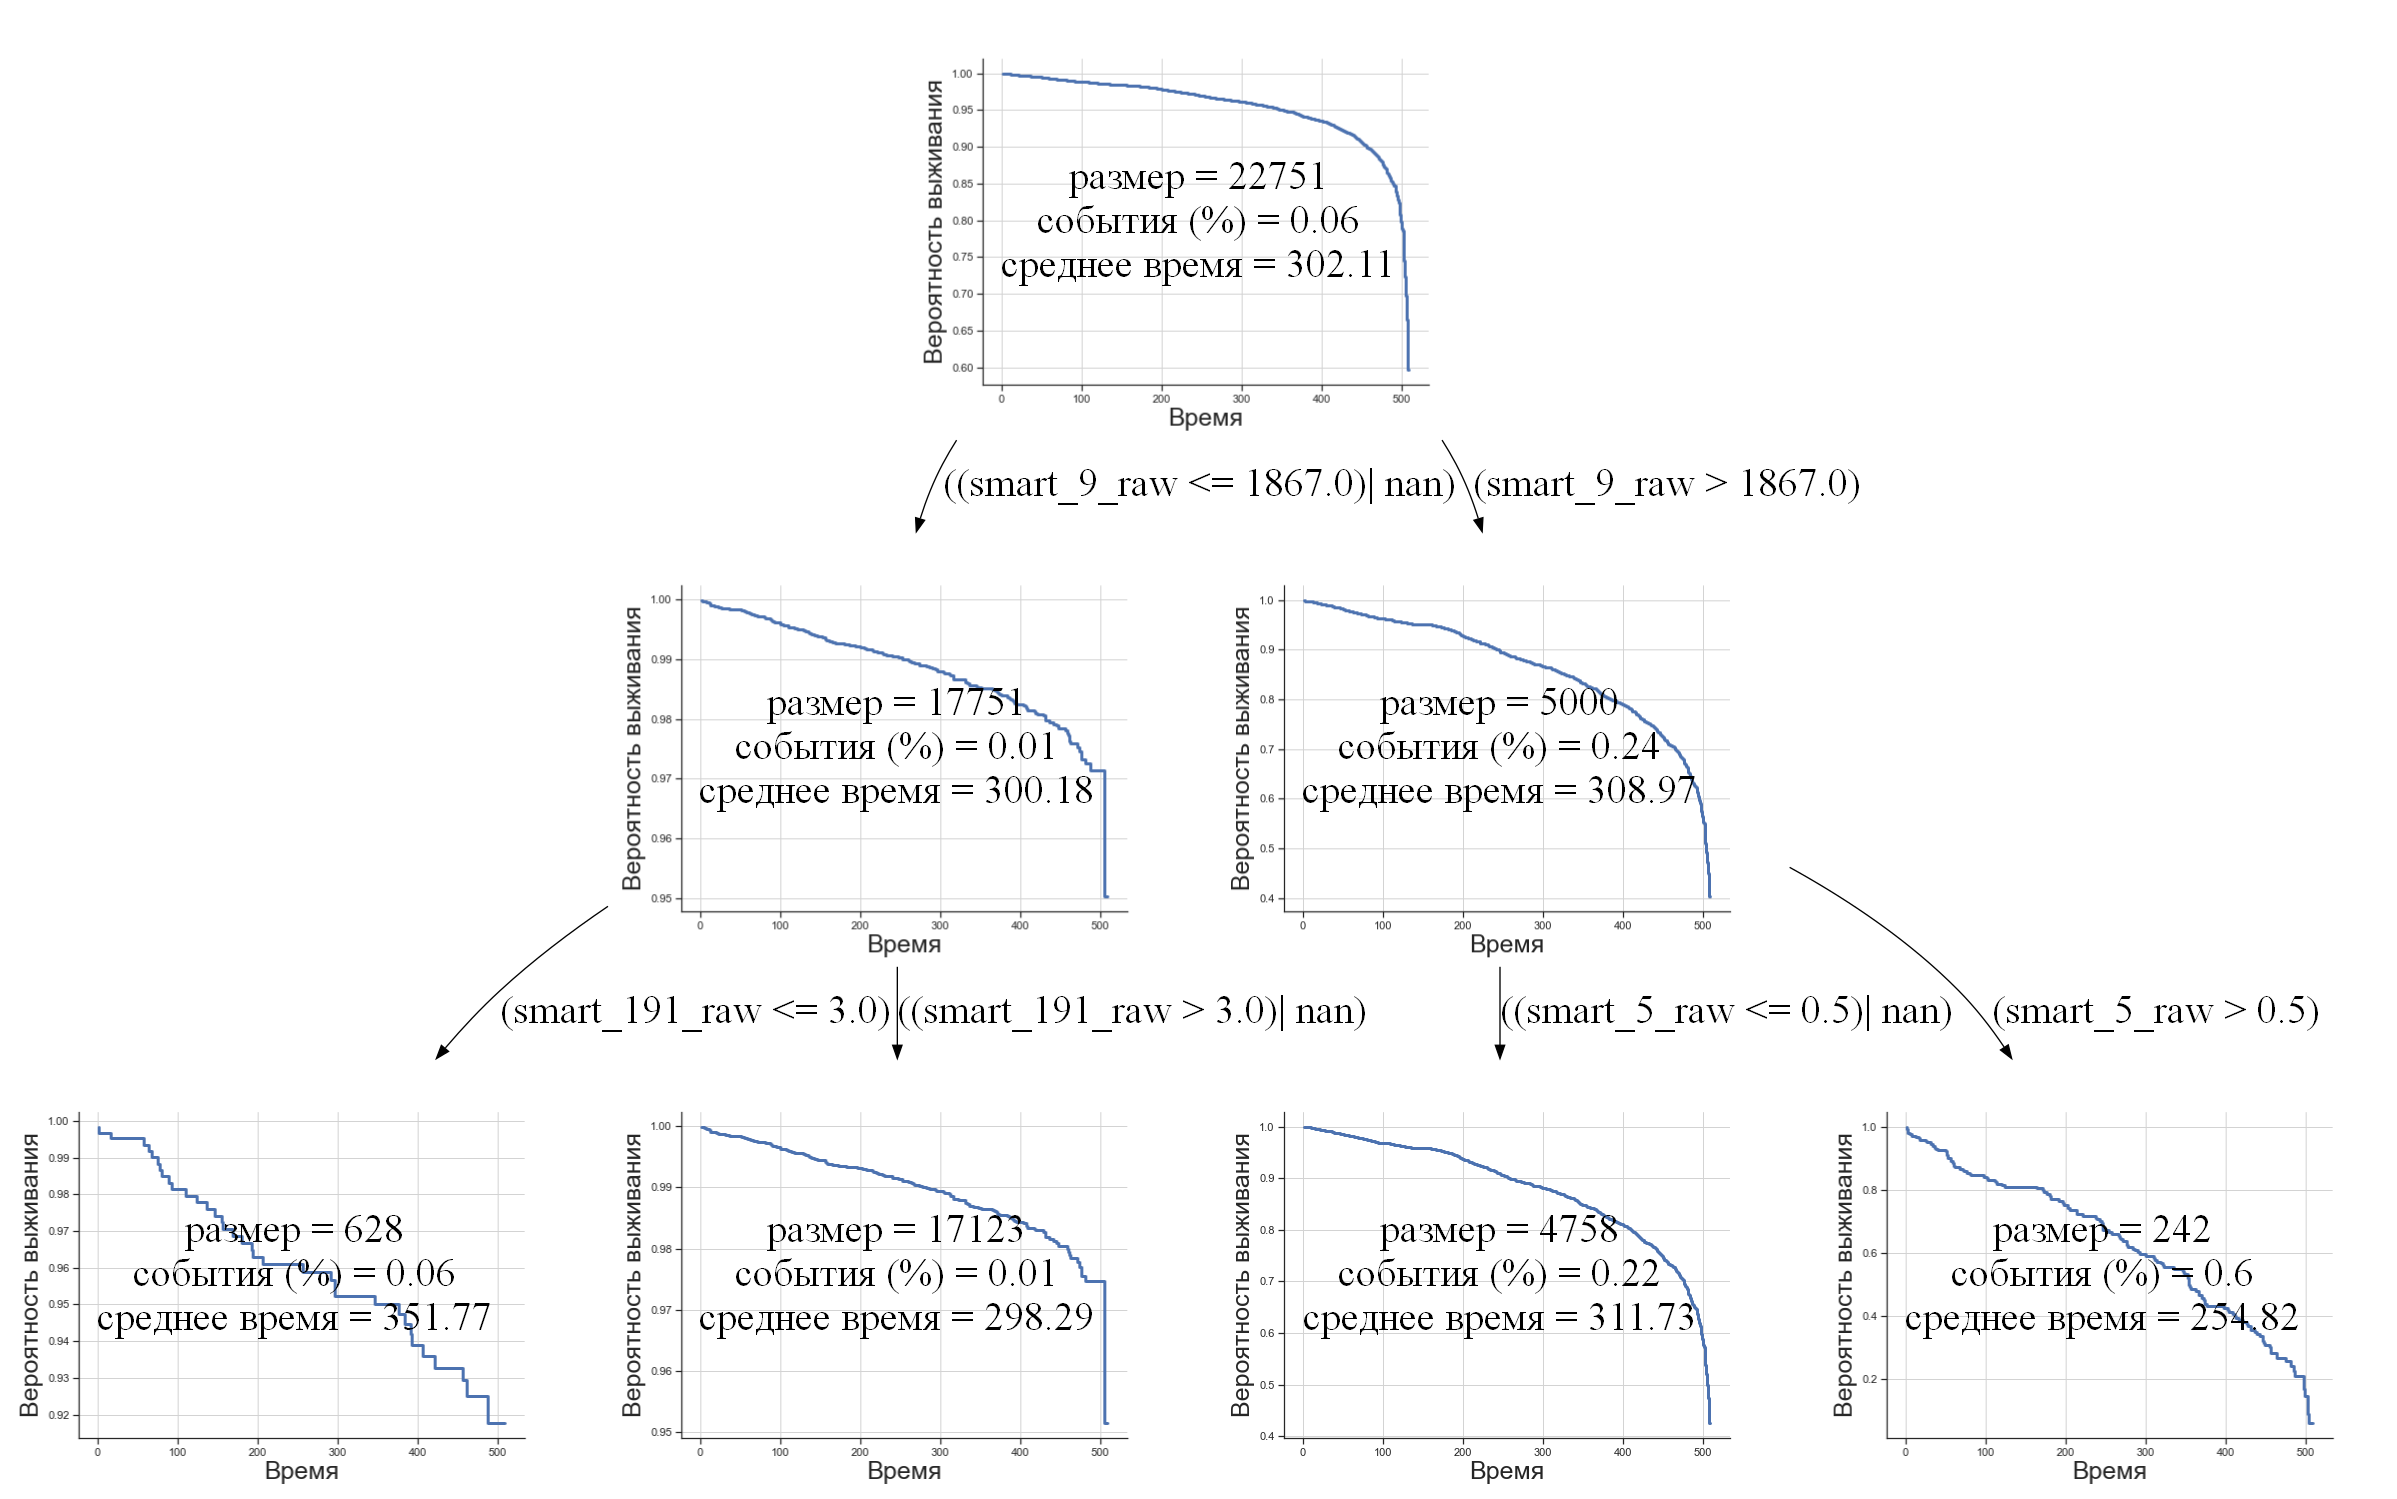

In [91]:
model_a_a.visualize(mode="surv", lang="ru")

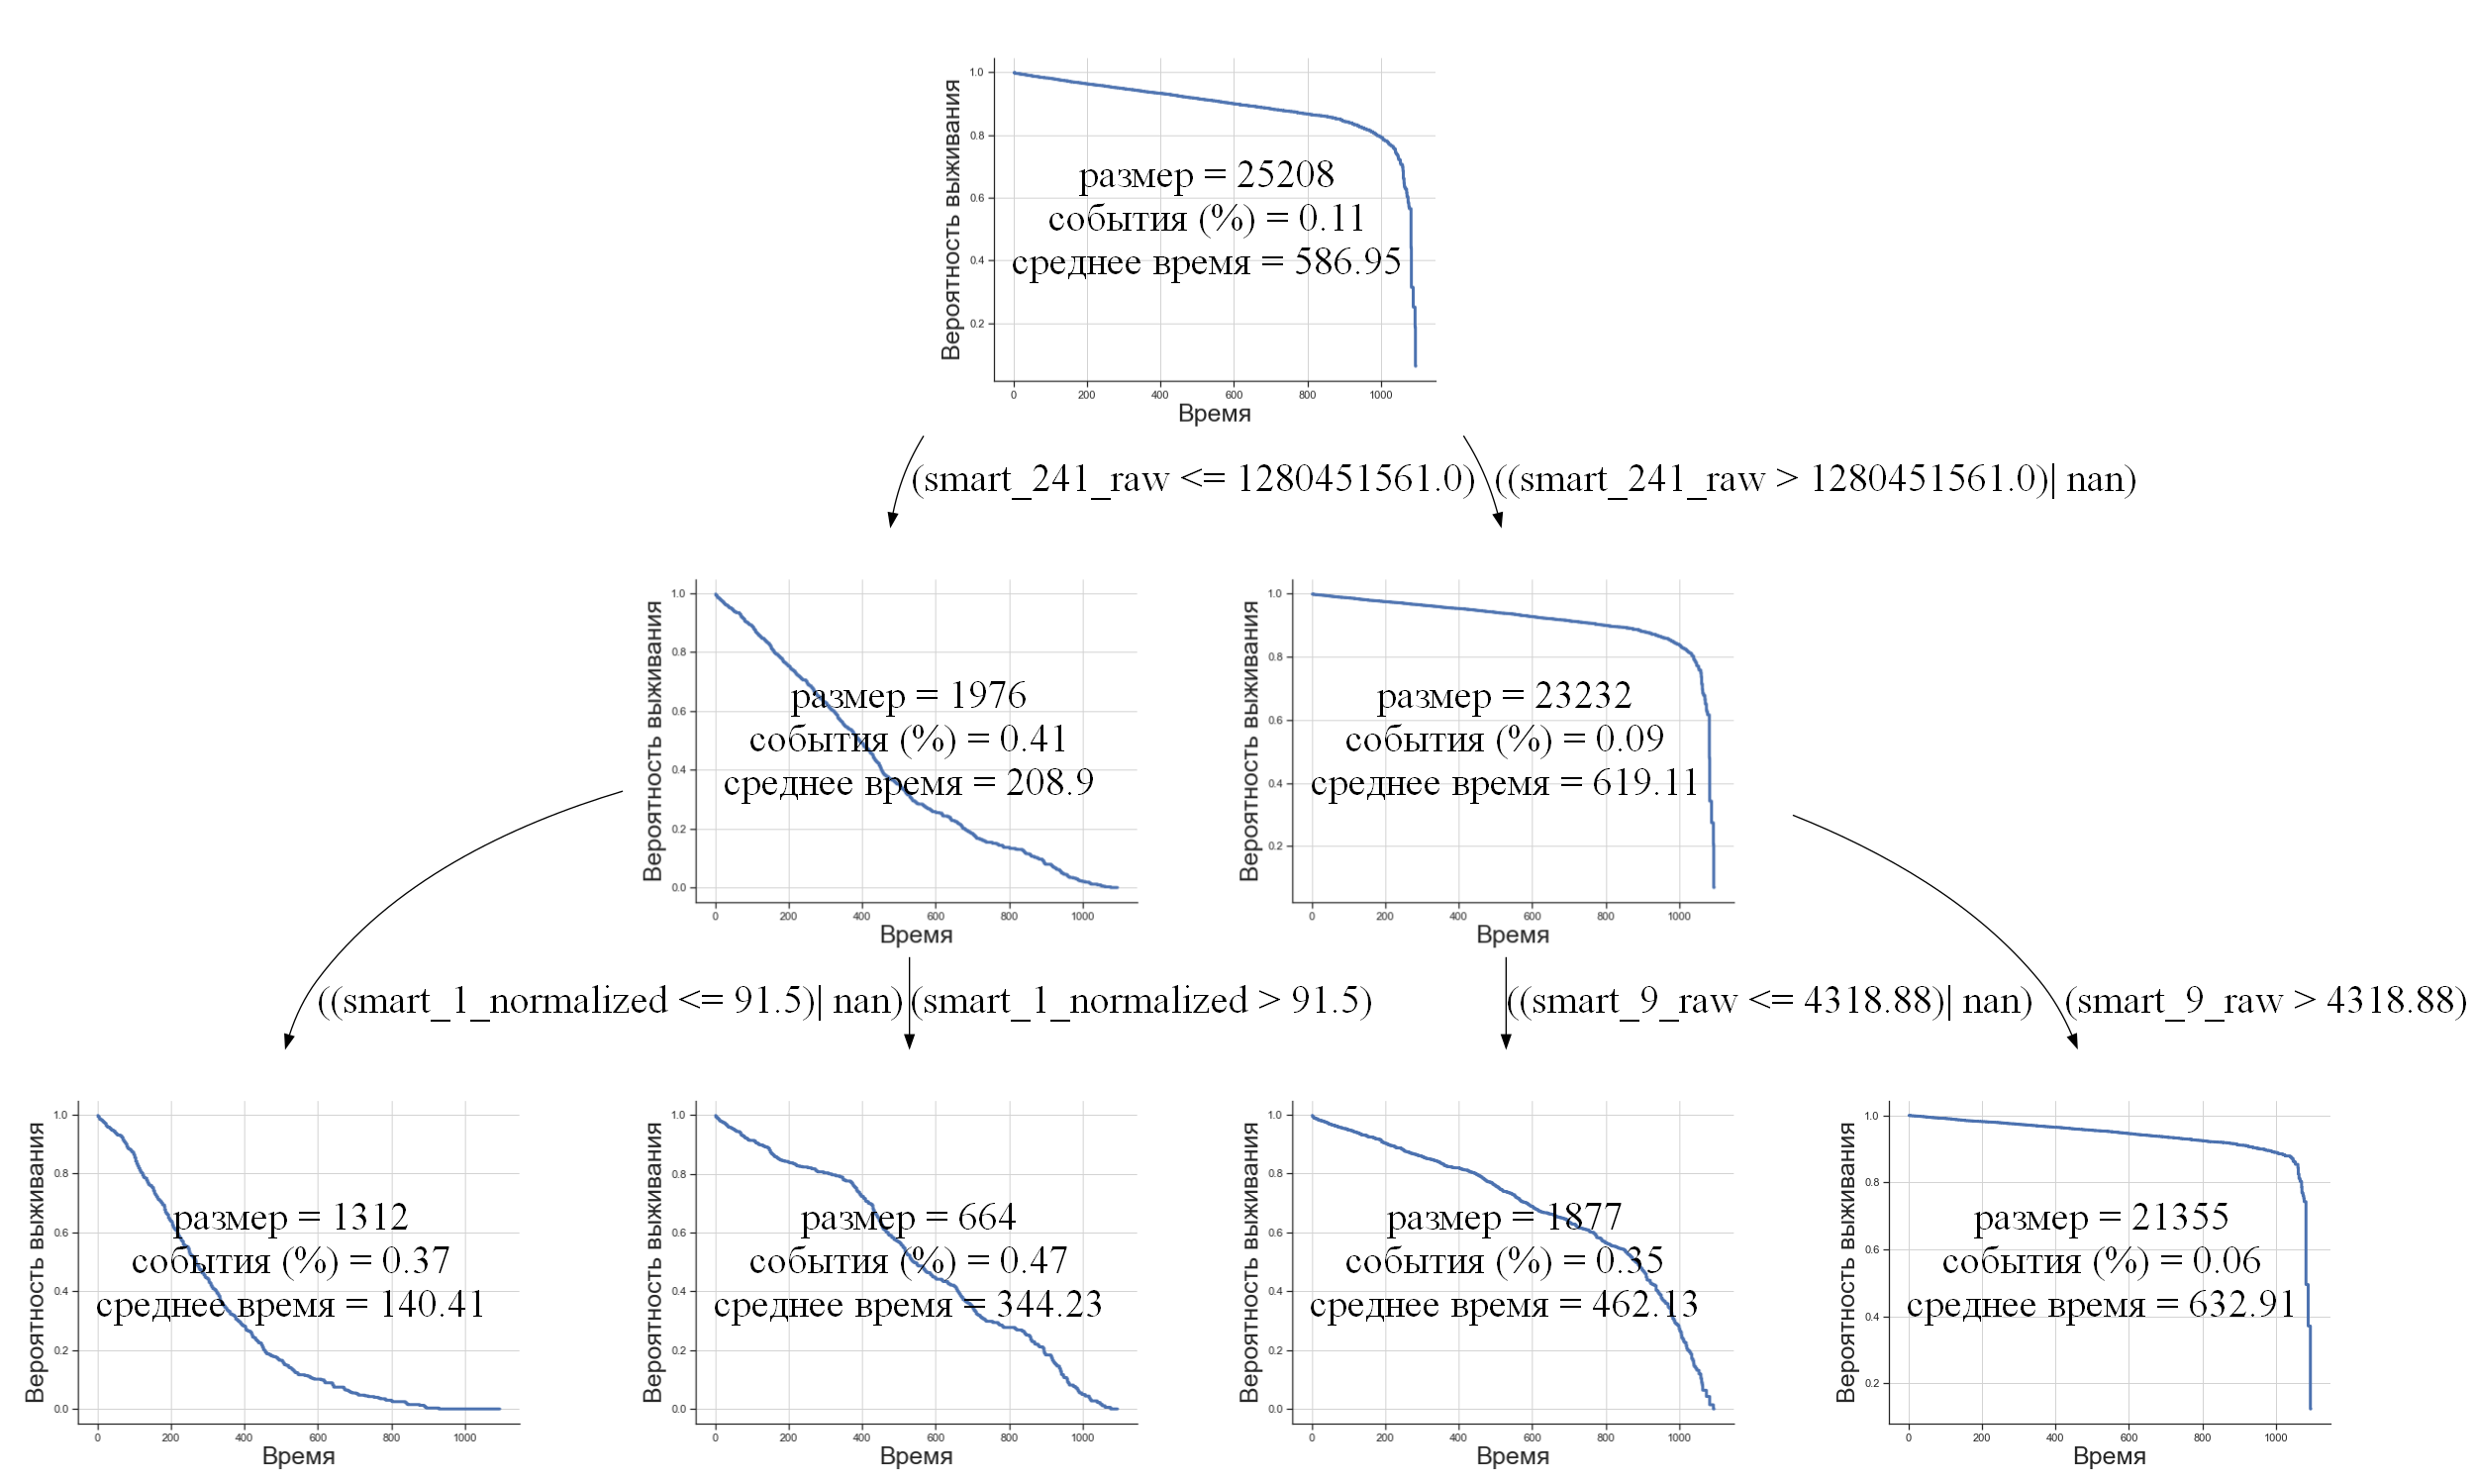

In [92]:
model_b_b.visualize(mode="surv", lang="ru")

In [105]:
model_b_b.nodes[1].get_full_rule()

'(smart_241_raw <= 1280451561.0)'

In [170]:
def get_importance(model, features=[]):
    d = {f: 0 for f in features}
    for i, node in model.nodes.items():
        if (node.is_leaf):
            for f_name in list(set([f.get_feature() for f in node.full_rule])):
#                 print(node.get_full_rule(), f.get_feature(), node.size)
                d[f_name] += node.size
    return pd.Series(d) / model.nodes[0].size

def get_ensemble_importance(ens_model, features):
    n = 0
    f_i = pd.Series({f: 0 for f in features})
    for t in ens_model.models:
        f_i += get_importance(t, features)
        n += 1
    return f_i / n

get_ensemble_importance(ens_a_a, X_a_tr.columns).sort_values(ascending=False)[:10]

smart_241_raw         0.880951
smart_188_raw         0.675815
smart_9_raw           0.584524
smart_7_normalized    0.508939
smart_191_raw         0.499042
smart_192_raw         0.481396
smart_240_raw         0.454203
smart_7_raw           0.426882
smart_193_raw         0.415696
smart_4_raw           0.410660
dtype: float64

In [172]:
get_ensemble_importance(ens_b_b, X_b_tr.columns).sort_values(ascending=False)[:12]

smart_9_raw             0.867020
smart_197_raw           0.772888
smart_240_raw           0.636964
smart_241_raw           0.600563
smart_194_normalized    0.553040
model                   0.548328
smart_5_raw             0.450238
smart_195_normalized    0.412098
capacity_bytes          0.405857
smart_1_raw             0.356400
smart_196_raw           0.334811
smart_242_raw           0.332185
dtype: float64

In [167]:
pd.Series(d) / model_b_b.nodes[0].size

smart_241_raw         1.000000
smart_1_normalized    0.078388
smart_9_raw           0.921612
dtype: float64

In [143]:
model = CRAID(**best_param_b)
model.fit(X_meta_ftr, y_meta_ftr)

In [147]:
rules = model.predict(X_meta_ftr, mode="rules")

In [166]:
def count_in_rules(x, r):
    return sum([x in r_ for r_ in r])

weights = [count_in_rules(c, rules) for c in X_meta_ftr.columns]
imp = dict(zip(X_meta_ftr.columns, np.array(weights) / rules.shape[0]))

In [168]:
sorted(imp.items(), key=lambda x: x[1])

[('smart_10_normalized', 0.0),
 ('smart_10_raw', 0.0),
 ('smart_12_normalized', 0.0),
 ('smart_184_normalized', 0.0),
 ('smart_184_raw', 0.0),
 ('smart_187_normalized', 0.0),
 ('smart_188_normalized', 0.0),
 ('smart_188_raw', 0.0),
 ('smart_189_normalized', 0.0),
 ('smart_189_raw', 0.0),
 ('smart_191_normalized', 0.0),
 ('smart_192_normalized', 0.0),
 ('smart_197_normalized', 0.0),
 ('smart_198_normalized', 0.0),
 ('smart_198_raw', 0.0),
 ('smart_199_normalized', 0.0),
 ('smart_199_raw', 0.0),
 ('smart_240_normalized', 0.0),
 ('smart_241_normalized', 0.0),
 ('smart_242_normalized', 0.0),
 ('smart_4_normalized', 0.0),
 ('smart_7_normalized', 0.0),
 ('smart_9_normalized', 0.0),
 ('smart_11_normalized', 0.0),
 ('smart_11_raw', 0.0),
 ('smart_183_normalized', 0.0),
 ('smart_183_raw', 0.0),
 ('smart_196_normalized', 0.0),
 ('smart_200_normalized', 0.0),
 ('smart_200_raw', 0.0),
 ('smart_223_normalized', 0.0),
 ('smart_223_raw', 0.0),
 ('smart_2_normalized', 0.0),
 ('smart_8_normalized', 0.0

In [ ]:
# SMART PARAMS: https://ru.wikipedia.org/wiki/S.M.A.R.T.

In [12]:
np.bincount(y_b_HO["cens"]) / y_b_HO["cens"].shape

array([0.88749295, 0.11250705])

In [34]:
a = pd.DataFrame([], columns=X_b.columns)

In [36]:
a[X_a.columns] = X_a

In [37]:
a

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw
0,NaN,NaN,100.0,0.0,NaN,NaN,100.0,15.0,NaN,NaN,...,100.0,15.0,100.0,0.0,64.0,2703879.0,NaN,NaN,100.0,25.0
1,NaN,NaN,100.0,0.0,NaN,NaN,100.0,29.0,NaN,NaN,...,100.0,29.0,100.0,0.0,73.0,18196221.0,NaN,NaN,100.0,83.0
2,NaN,NaN,100.0,0.0,NaN,NaN,100.0,20.0,NaN,NaN,...,100.0,20.0,100.0,0.0,69.0,7205841.0,NaN,NaN,100.0,29.0
3,NaN,NaN,100.0,0.0,NaN,NaN,100.0,30.0,NaN,NaN,...,100.0,30.0,100.0,0.0,72.0,16669075.0,NaN,NaN,100.0,77.0
4,NaN,NaN,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,21.0,100.0,0.0,70.0,10500760.0,NaN,NaN,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,NaN,NaN,100.0,0.0,NaN,NaN,100.0,8.0,NaN,NaN,...,100.0,8.0,93.0,1304.0,81.0,139435883.0,NaN,NaN,81.0,16869.0
33953,NaN,NaN,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,21.0,100.0,0.0,70.0,10438056.0,NaN,NaN,100.0,107.0
33954,NaN,NaN,100.0,0.0,NaN,NaN,100.0,20.0,NaN,NaN,...,100.0,20.0,100.0,0.0,72.0,16909229.0,NaN,NaN,100.0,232.0
33955,NaN,NaN,100.0,0.0,NaN,NaN,100.0,16.0,NaN,NaN,...,100.0,16.0,100.0,0.0,70.0,11195897.0,NaN,NaN,100.0,708.0


In [45]:
X_b.values[:, :X_a.shape[1]].shape

(37625, 48)

In [49]:
pd.DataFrame(X_a.values, columns=X_b.columns[:X_a.shape[1]])

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_1_normalized,smart_1_raw,smart_200_normalized,smart_200_raw,smart_223_normalized,smart_223_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw
0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,15.0,100.0,0.0,64.0,2703879.0,100.0,25.0
1,100.0,0.0,100.0,29.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,29.0,100.0,0.0,73.0,18196221.0,100.0,83.0
2,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,69.0,7205841.0,100.0,29.0
3,100.0,0.0,100.0,30.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,85.0,0.0,100.0,30.0,100.0,0.0,72.0,16669075.0,100.0,77.0
4,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,21.0,100.0,0.0,70.0,10500760.0,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,100.0,4.295033e+09,...,93.0,0.0,100.0,8.0,93.0,1304.0,81.0,139435883.0,81.0,16869.0
33953,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,21.0,100.0,0.0,70.0,10438056.0,100.0,107.0
33954,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,72.0,16909229.0,100.0,232.0
33955,100.0,0.0,100.0,16.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,16.0,100.0,0.0,70.0,11195897.0,100.0,708.0


In [85]:
df = pd.read_csv(r"D:\SurvivalAnalysis\CompetingRisk\files\result_full.csv")
# (47110605, 38)

In [86]:
df["zero_balance_code"].value_counts()

zero_balance_code
 1.0     33115920
-1.0     13079853
 9.0       360349
 16.0      170887
 3.0       131947
 96.0      110362
 2.0       105354
 15.0       35933
Name: count, dtype: int64

KeyboardInterrupt: 

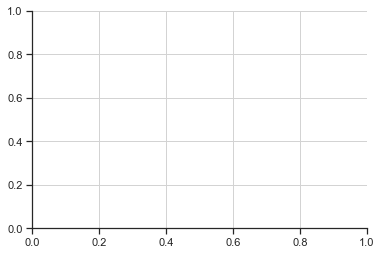

In [87]:
sns.kdeplot(df, x="time", hue="zero_balance_code")

In [88]:
df_l = []
for c, s in df.groupby("zero_balance_code"):
    df_l.append(s.sort_values("first_payment_date")[:35000])
df_bal_full = pd.concat(df_l)

In [89]:
df_bal_full["zero_balance_code"].value_counts()

zero_balance_code
-1.0     35000
 1.0     35000
 2.0     35000
 3.0     35000
 9.0     35000
 15.0    35000
 16.0    35000
 96.0    35000
Name: count, dtype: int64

<Axes: xlabel='time', ylabel='Density'>

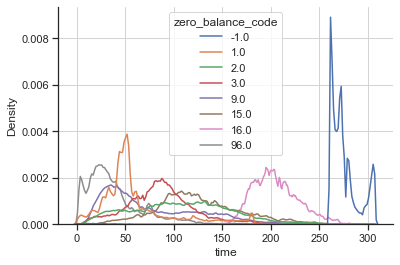

In [92]:
df_bal_full["zero_balance_code"] = df_bal_full["zero_balance_code"].astype("category")
sns.kdeplot(df_bal_full, x="time", hue="zero_balance_code", bw_adjust=0.2)

In [14]:
df_bal_full.to_csv(r"D:\SurvivalAnalysis\CompetingRisk\files\result_280bal.csv", index=False)

In [4]:
df_short = pd.read_csv(r"D:\SurvivalAnalysis\CompetingRisk\files\result_short.csv")

In [5]:
df_short["zero_balance_code"].value_counts()

zero_balance_code
 1.0     3000
 9.0     3000
 96.0    3000
 16.0    3000
-1.0     3000
 3.0     3000
 2.0     3000
 15.0    3000
Name: count, dtype: int64

In [18]:
(df_short["first_payment_date"] // 100).value_counts()

first_payment_date
2000    10540
2001    10099
2002     1999
2003     1322
2004       11
2005        7
2006        4
2010        4
2011        4
2007        2
2009        2
2008        2
2012        2
2014        1
2013        1
Name: count, dtype: int64

<Axes: xlabel='time', ylabel='Density'>

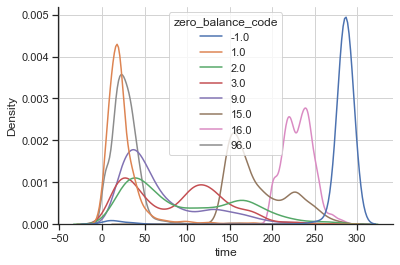

In [16]:
df_short["zero_balance_code"] = df_short["zero_balance_code"].astype("category")

sns.kdeplot(df_short, x="time", hue="zero_balance_code")